In [120]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
plt.style.use("dark_background")

In [135]:
"""
All variables in this cell.
"""


G = 9.8  # gravitational pull, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
# The time array
dt = 0.05
time = np.arange(0, 60+dt, dt)

In [136]:
"""
Define the derivative function and solve the ODE in this cell.
"""


def solve_double_pendulum(theta1_initial=90, w1_initial=0, theta2_initial=0, w2_initial=0, L1=1, L2=1, M1=1, M2=1):
    """
    theta1_initial and theta2_initial are the initial angles (in degrees)
    w1_initial and w2_initial are the initial angular velocities (degrees per second)
    L1 = 1.0   length of pendulum 1 in m
    L2 = 1.0   length of pendulum 2 in m
    M1 = 1.0   mass of pendulum 1 in kg
    M2 = 1.0   mass of pendulum 2 in kg
    """


    # Initial state converted in radians:
    y0 = np.radians([theta1_initial, w1_initial, theta2_initial, w2_initial])
    def derivs(y, time):
        dydx = np.zeros_like(y)
        dydx[0] = y[1]
        dydx[2] = y[3]
        sin_delta = np.sin(y[2] - y[0])
        cos_delta = np.cos(y[2] - y[0])
        # denominator of theta1 double dot:
        denominator1 = (M1 + M2)*L1 - M2*L1*cos_delta**2
        # theta1 double dot:
        dydx[1] = (M2*L1*y[1]*y[1]*sin_delta*cos_delta +
                M2*G*np.sin(y[2])*cos_delta +
                M2*L2*y[3]*y[3]*sin_delta -
                (M1 + M2)*G*np.sin(y[0])) / denominator1
        # denominator of theta2 double dot:
        denominator2 = (L2/L1) * denominator1
        # theta2 double dot:
        dydx[3] = (-M2*L2*y[3]*y[3]*sin_delta*cos_delta +
                (M1 + M2)*(G*np.sin(y[0])*cos_delta -
                L1*y[1]*y[1]*sin_delta -
                G*np.sin(y[2]))) / denominator2
        return dydx


    # Integrate the coupled second-order ordinary differential equations using scipy.integrate:
    ans = integrate.odeint(derivs, y0, time)
    return ans

In [231]:
ans1 = solve_double_pendulum(theta1_initial=90)
ans2 = solve_double_pendulum(theta1_initial=90.001)

ans3 = solve_double_pendulum(theta1_initial=90, theta2_initial=90)
ans4 = solve_double_pendulum(theta1_initial=90, theta2_initial=90.000001)

ans5 = solve_double_pendulum(theta1_initial=120, theta2_initial=60)
ans6 = solve_double_pendulum(theta1_initial=120, theta2_initial=60.000001)

$\Large Figures$

C:\Users\user\AppData\Local\Temp\ipykernel_11932\4292503022.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-10, 80, 10))


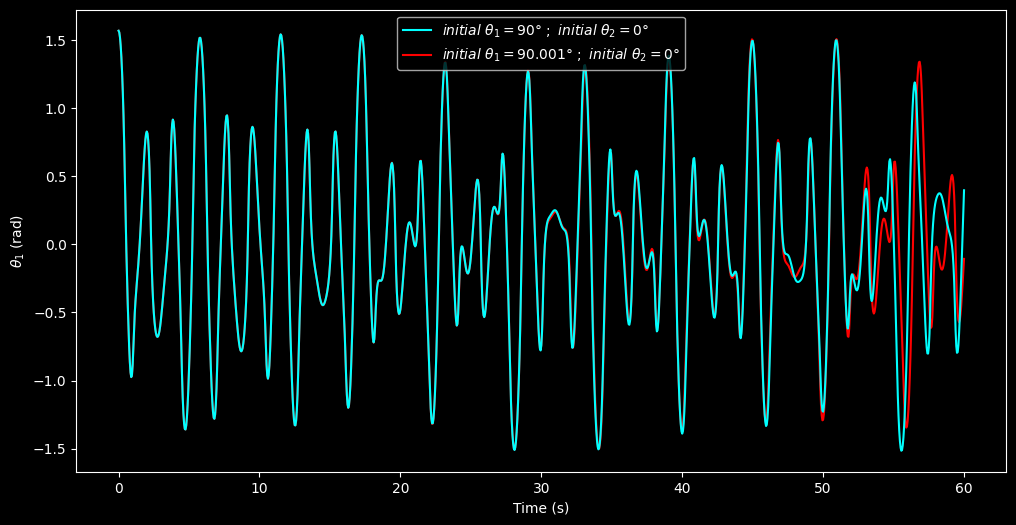

In [232]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ans1[:,0], "aqua", zorder=2, label="$initial \ \\theta_1 = 90 \\degree \ ; \ initial \ \\theta_2 = 0 \\degree$")
ax.plot(ans2[:,0], "red", zorder=1, label="$initial \ \\theta_1 = 90.001 \\degree \ ; \ initial \ \\theta_2 = 0 \\degree$")
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\\theta_1$ (rad)")
ax.set_xticklabels(np.arange(-10, 80, 10))
ax.legend();
fig.savefig("theta1_90.jpg");

C:\Users\user\AppData\Local\Temp\ipykernel_11932\829833286.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-10, 80, 10))


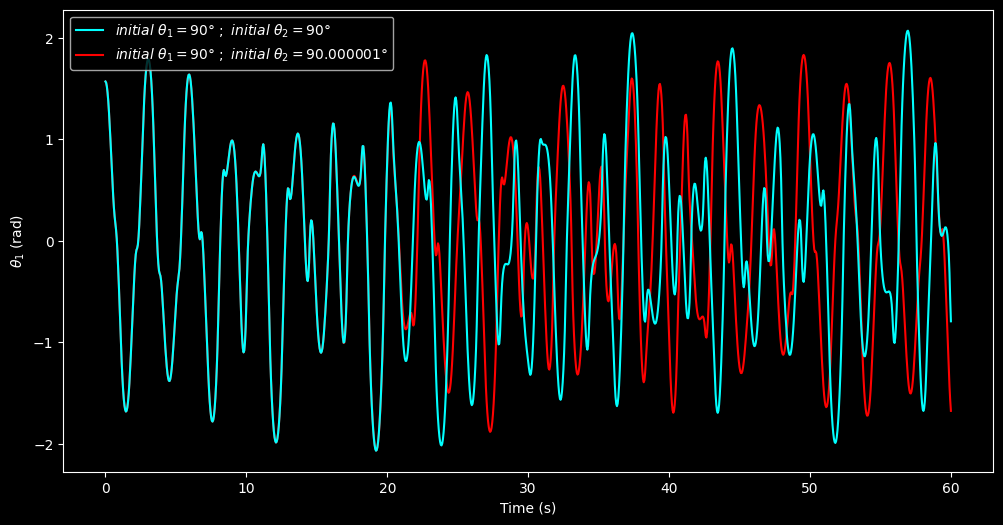

In [233]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ans3[:,0], "aqua", zorder=2, label="$initial \ \\theta_1 = 90 \\degree \ ; \ initial \ \\theta_2 = 90 \\degree$")
ax.plot(ans4[:,0], "red", zorder=1, label="$initial \ \\theta_1 = 90 \\degree \ ; \ initial \ \\theta_2 = 90.000001 \\degree$")
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\\theta_1$ (rad)")
ax.set_xticklabels(np.arange(-10, 80, 10))
ax.legend();
fig.savefig("theta2_90.jpg");

C:\Users\user\AppData\Local\Temp\ipykernel_11932\187805334.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-10, 80, 10))


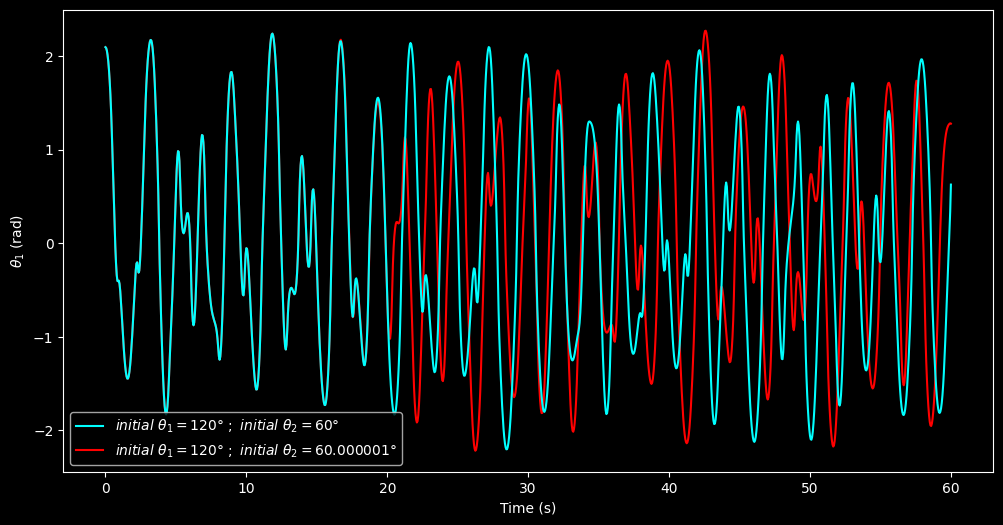

In [234]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ans5[:,0], "aqua", zorder=2, label="$initial \ \\theta_1 = 120 \\degree \ ; \ initial \ \\theta_2 = 60 \\degree$")
ax.plot(ans6[:,0], "red", zorder=1, label="$initial \ \\theta_1 = 120 \\degree \ ; \ initial \ \\theta_2 = 60.000001 \\degree$")
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\\theta_1$ (rad)")
ax.set_xticklabels(np.arange(-10, 80, 10))
ax.legend();
fig.savefig("theta1_120.jpg");

$\Large Animation$

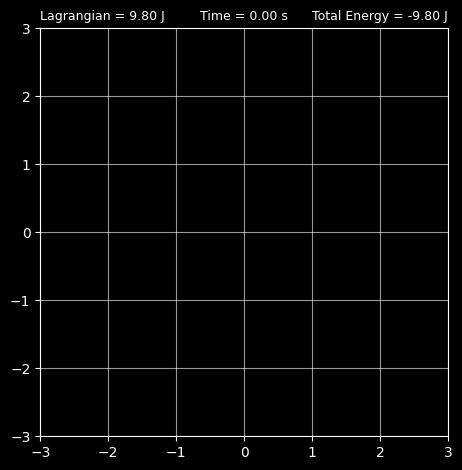

In [235]:
"""
Animation in this cell.
"""


# Elicitting data from ans1 to compute the total energy, the Lagrangian and the postions:
theta1 = ans1[:, 0]
theta2 = ans1[:, 2]
omega1 = ans1[:, 1]
omega2 = ans1[:, 3]
# Kinetic energy:
T = 0.5*M1*L1**2*omega1**2 + 0.5*M2*(L1**2*omega1**2 + L2**2*omega2**2 + 2*L1*L2*omega1*omega2*np.cos(theta1-theta2))
# potential:
V = -(M1+M2)*G*L1*np.cos(ans1[:,0]) - M2*G*L2*np.cos(ans1[:,2])
total_energy = T + V
Lagrangian = T - V
# Finding positions of the two bulbs. These will be used to plot:
x1 = L1*np.sin(theta1)
y1 = -L1*np.cos(theta1)
x2 = L2*np.sin(theta2) + x1
y2 = -L2*np.cos(theta2) + y1


# Initializing the plot:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim((-(L1+L2)-1, (L1+L2)+1))
ax.set_ylim((-(L1+L2)-1, (L1+L2)+1))
ax.grid(alpha=0.6)

line, = ax.plot([], [], color="m", marker="o", ms=12, lw=3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
Lagrangian_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)


def init():
    """Initialize animation"""
    line.set_data([], [])
    ax.set_title(f"Time = {time[0]:.2f} s", fontsize=9)
    ax.set_title(f"Total Energy = {total_energy[0]:.2f} J", loc="right", fontsize=9)
    ax.set_title(f"Lagrangian = {Lagrangian[0]:.2f} J", loc="left", fontsize=9)
    plt.tight_layout()
    return line, time_text, energy_text


def animate(i):
    """Perform animation step"""
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    ax.set_title(f"Time = {time[i]:.2f} s", fontsize=9)
    ax.set_title(f"Total Energy = {total_energy[i]:.2f} J", loc="right", fontsize=9)
    ax.set_title(f"Lagrangian = {Lagrangian[i]:.2f} J", loc="left", fontsize=9)
    plt.tight_layout()
    return line, time_text, energy_text
    

anim1 = animation.FuncAnimation(fig, animate, init_func=init, frames=1200, blit=True);

In [236]:
# Saving the animation in mp4:
# This cell takes 45 seconds to execute.
dpi = 300
writer = animation.writers["ffmpeg"](fps=20)
anim1.save("Animation1.mp4", writer=writer, dpi=dpi)

<Figure size 640x480 with 0 Axes>

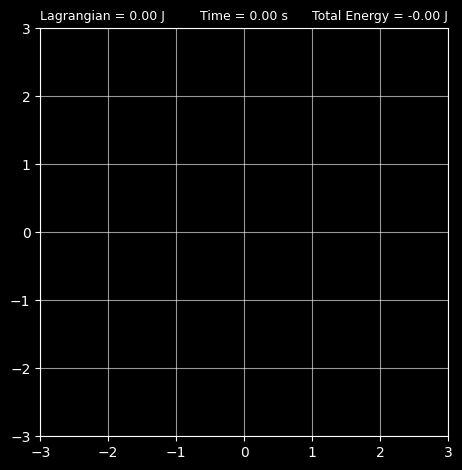

In [237]:
"""
Animation in this cell.
"""


# Elicitting data from ans3 to compute the total energy, the Lagrangian and the postions:
theta1 = ans3[:, 0]
theta2 = ans3[:, 2]
omega1 = ans3[:, 1]
omega2 = ans3[:, 3]
# Kinetic energy:
T = 0.5*M1*L1**2*omega1**2 + 0.5*M2*(L1**2*omega1**2 + L2**2*omega2**2 + 2*L1*L2*omega1*omega2*np.cos(theta1-theta2))
# potential:
V = -(M1+M2)*G*L1*np.cos(ans3[:,0]) - M2*G*L2*np.cos(ans3[:,2])
total_energy = T + V
Lagrangian = T - V
# Finding positions of the two bulbs. These will be used to plot:
x1 = L1*np.sin(theta1)
y1 = -L1*np.cos(theta1)
x2 = L2*np.sin(theta2) + x1
y2 = -L2*np.cos(theta2) + y1


# Initializing the plot:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim((-(L1+L2)-1, (L1+L2)+1))
ax.set_ylim((-(L1+L2)-1, (L1+L2)+1))
ax.grid(alpha=0.6)

line, = ax.plot([], [], color="m", marker="o", ms=12, lw=3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
Lagrangian_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)


def init():
    """Initialize animation"""
    line.set_data([], [])
    ax.set_title(f"Time = {time[0]:.2f} s", fontsize=9)
    ax.set_title(f"Total Energy = {total_energy[0]:.2f} J", loc="right", fontsize=9)
    ax.set_title(f"Lagrangian = {Lagrangian[0]:.2f} J", loc="left", fontsize=9)
    plt.tight_layout()
    return line, time_text, energy_text


def animate(i):
    """Perform animation step"""
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    ax.set_title(f"Time = {time[i]:.2f} s", fontsize=9)
    ax.set_title(f"Total Energy = {total_energy[i]:.2f} J", loc="right", fontsize=9)
    ax.set_title(f"Lagrangian = {Lagrangian[i]:.2f} J", loc="left", fontsize=9)
    plt.tight_layout()
    return line, time_text, energy_text
    

anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=1200, blit=True);

In [238]:
# Saving the animation in mp4:
# This cell takes 45 seconds to execute.
dpi = 300
writer = animation.writers["ffmpeg"](fps=20)
anim2.save("Animation2.mp4", writer=writer, dpi=dpi)

<Figure size 640x480 with 0 Axes>

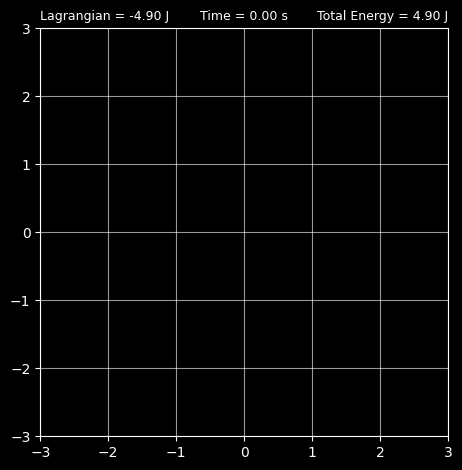

In [239]:
"""
Animation in this cell.
"""


# Elicitting data from ans5 to compute the total energy, the Lagrangian and the postions:
theta1 = ans5[:, 0]
theta2 = ans5[:, 2]
omega1 = ans5[:, 1]
omega2 = ans5[:, 3]
# Kinetic energy:
T = 0.5*M1*L1**2*omega1**2 + 0.5*M2*(L1**2*omega1**2 + L2**2*omega2**2 + 2*L1*L2*omega1*omega2*np.cos(theta1-theta2))
# potential:
V = -(M1+M2)*G*L1*np.cos(ans5[:,0]) - M2*G*L2*np.cos(ans5[:,2])
total_energy = T + V
Lagrangian = T - V
# Finding positions of the two bulbs. These will be used to plot:
x1 = L1*np.sin(theta1)
y1 = -L1*np.cos(theta1)
x2 = L2*np.sin(theta2) + x1
y2 = -L2*np.cos(theta2) + y1


# Initializing the plot:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim((-(L1+L2)-1, (L1+L2)+1))
ax.set_ylim((-(L1+L2)-1, (L1+L2)+1))
ax.grid(alpha=0.6)

line, = ax.plot([], [], color="m", marker="o", ms=12, lw=3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
Lagrangian_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)


def init():
    """Initialize animation"""
    line.set_data([], [])
    ax.set_title(f"Time = {time[0]:.2f} s", fontsize=9)
    ax.set_title(f"Total Energy = {total_energy[0]:.2f} J", loc="right", fontsize=9)
    ax.set_title(f"Lagrangian = {Lagrangian[0]:.2f} J", loc="left", fontsize=9)
    plt.tight_layout()
    return line, time_text, energy_text


def animate(i):
    """Perform animation step"""
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    ax.set_title(f"Time = {time[i]:.2f} s", fontsize=9)
    ax.set_title(f"Total Energy = {total_energy[i]:.2f} J", loc="right", fontsize=9)
    ax.set_title(f"Lagrangian = {Lagrangian[i]:.2f} J", loc="left", fontsize=9)
    plt.tight_layout()
    return line, time_text, energy_text
    

anim3 = animation.FuncAnimation(fig, animate, init_func=init, frames=1200, blit=True);

In [240]:
# Saving the animation in mp4:
# This cell takes 45 seconds to execute.
dpi = 300
writer = animation.writers["ffmpeg"](fps=20)
anim3.save("Animation3.mp4", writer=writer, dpi=dpi)

<Figure size 640x480 with 0 Axes>